In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold

In [10]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
np.unique(df["quality"].values)

array([3, 4, 5, 6, 7, 8])

In [12]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df["quality"] = df["quality"].map(quality_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [13]:
X = df[["fixed acidity","volatile acidity","citric acid", "residual sugar","chlorides","free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]].values
y = df["quality"].values
print(X,y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]] [2 2 2 ... 3 2 3]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.63)
print(len(X_train),len(X_test),len(y_train),len(y_test))

1007 592 1007 592


In [26]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_acc = metrics.accuracy_score(y_train,y_train_pred)
test_acc = metrics.accuracy_score(y_test,y_test_pred)

print(train_acc, test_acc)

0.7775571002979146 0.5878378378378378


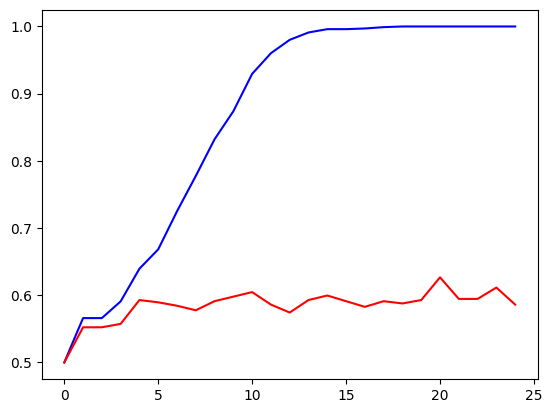

In [28]:
from turtle import color


train_accs = [0.5]
test_accs = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc = metrics.accuracy_score(y_train,y_train_pred)
    test_acc = metrics.accuracy_score(y_test,y_test_pred)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.plot(train_accs, color="b")
plt.plot(test_accs, color="r")
plt.show()

In [45]:
from sklearn.model_selection import KFold

df = pd.read_csv("winequality-red.csv")
df["kFold"]=-1
kf = KFold(n_splits=5, shuffle=True)

for fold, (trn_index, val_index) in enumerate(kf.split(X=df)):
    df.loc[val_index,"kFold"]=fold

df["kFold"] = df["kFold"].astype(int)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kFold
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,4


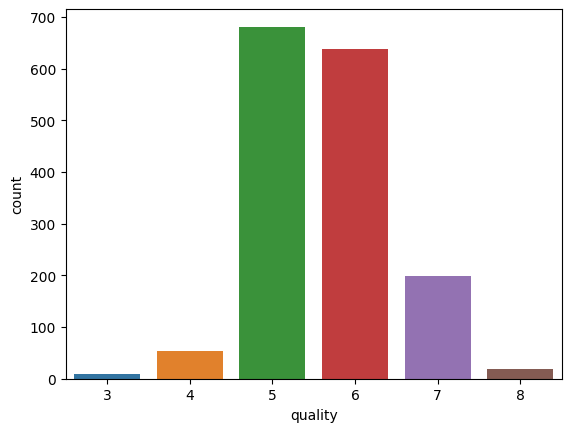

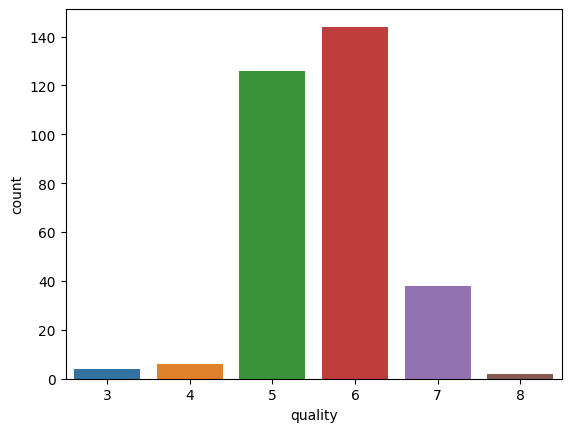

In [48]:
b = sns.countplot(x="quality",data=df)
plt.show()
b = sns.countplot(x="quality",data=df[df["kFold"]==0])
plt.show()

In [49]:
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv("winequality-red.csv")
df["kFold"]=-1
kf = StratifiedKFold(n_splits=5, shuffle=True)
y = df["quality"].values

for fold, (trn_index, val_index) in enumerate(kf.split(X=df,y=y)):
    df.loc[val_index,"kFold"]=fold

df["kFold"] = df["kFold"].astype(int)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kFold
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,3


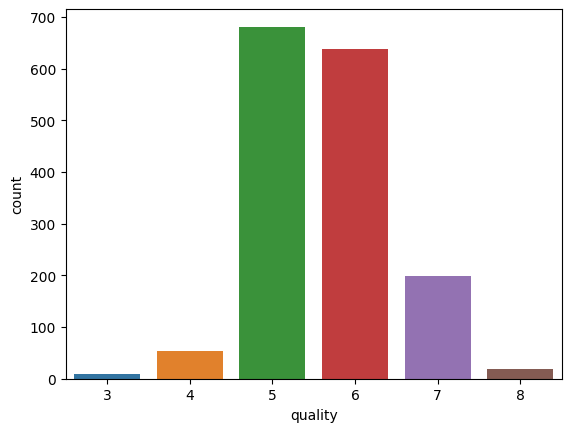

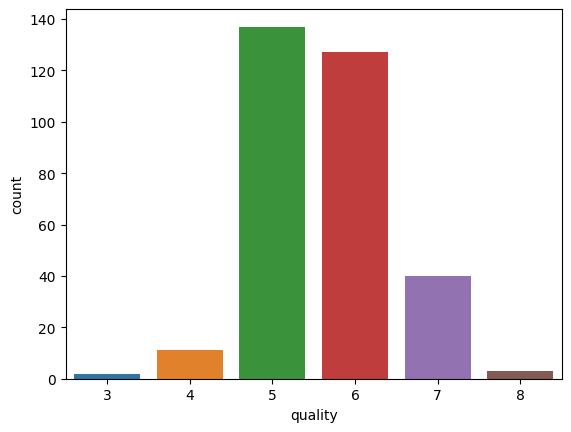

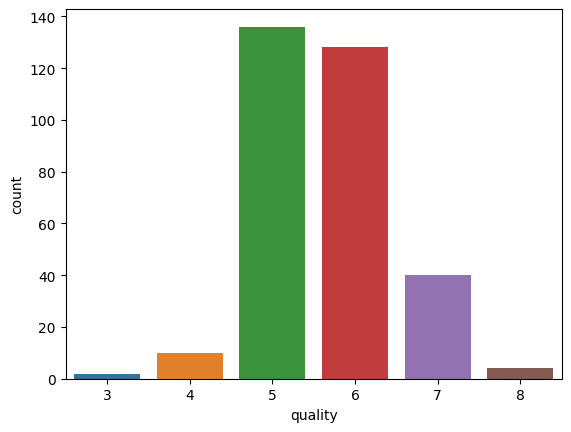

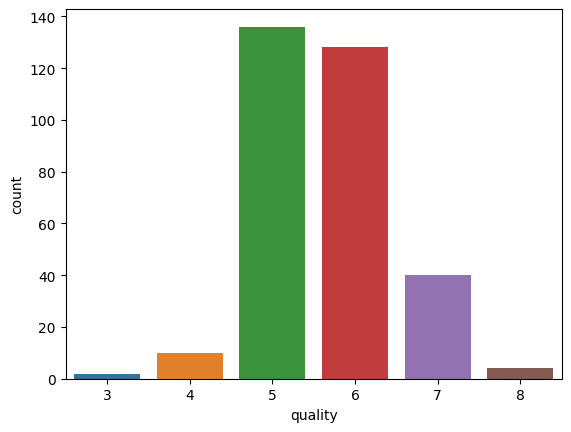

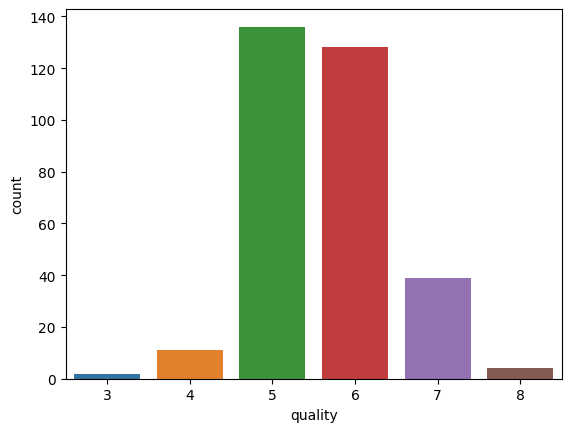

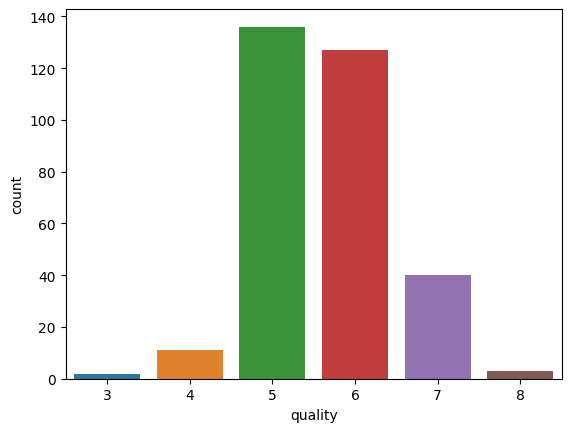

In [50]:
b = sns.countplot(x="quality",data=df)
plt.show()
for i in range(5):
    b = sns.countplot(x="quality",data=df[df["kFold"]==i])
    plt.show()

In [68]:
def creat_folds(df):
    df["kFold"]=-1
    num_bins = int(np.floor(1+np.log2(len(df))))
    df["bins"] = pd.cut(df["target"], bins=num_bins, labels=False)
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    for fold, (trn_, val_) in enumerate(kf.split(X=df, y=df["bins"])):
        df.loc[val_,"kFold"]=fold
    df = df.drop(columns=["bins"])
    return df

In [69]:
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)
df = pd.DataFrame(X, columns=[f"col{i}" for i in range(X.shape[1])])
df["target"]=y
df = creat_folds(df)
df

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col92,col93,col94,col95,col96,col97,col98,col99,target,kFold
0,-0.415126,-0.351965,-0.397667,-0.195816,-0.555724,0.274591,-0.070916,0.760620,1.506631,1.062140,...,0.836375,-0.779546,-0.467569,0.817883,1.204597,0.289580,0.792685,0.424637,64.336110,2
1,0.292467,-0.369207,-1.449204,-0.054793,-0.938181,1.079961,0.201375,0.300608,1.510600,0.562061,...,-0.201394,-0.440273,0.135723,-0.125510,-0.848421,-1.496801,-0.428045,-0.531428,-84.335795,1
2,-0.504118,-0.918149,-0.412777,-0.442946,-1.667408,-1.254616,0.231227,0.971203,-0.579981,-0.452793,...,-0.534534,0.895281,-0.451693,-0.321799,-0.224368,-0.994989,-0.215305,0.638863,-237.199511,3
3,0.837897,-0.727982,-1.663150,1.203290,-0.292238,0.125116,-0.552376,0.696429,1.163880,0.612120,...,-0.022496,-0.181721,0.946109,-1.713858,-0.056343,-1.135763,1.048551,0.606804,-108.460350,4
4,-0.365115,1.285774,0.856284,1.441993,0.479038,0.225515,1.455646,1.686627,0.130513,-0.726442,...,0.263649,-0.425630,0.011874,1.160823,0.858580,-1.054538,-0.166481,-0.862065,25.205676,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.762204,1.356722,0.289927,-0.190498,-0.356704,-2.117091,2.029185,-0.963101,-1.085209,0.797959,...,-0.160527,-1.370221,0.447954,1.276748,-0.621794,0.263658,-0.804905,0.969391,-142.924520,0
14996,-0.535027,1.205238,-0.839120,1.787972,1.091458,-0.446357,0.067201,-0.419616,0.173118,-0.971993,...,1.273468,0.876469,-0.610524,-0.458284,-1.029805,1.835920,1.102411,-0.555051,302.370185,0
14997,2.636403,-0.296276,1.105448,-0.131879,0.751280,0.270171,-0.199008,1.555481,-1.963352,-0.473513,...,-1.210241,-0.239819,0.599138,2.049855,0.449091,-1.503879,-0.457605,-0.068539,30.883311,1
14998,0.317759,2.824632,0.569828,-0.926146,2.024566,0.634411,0.774089,1.016615,0.703565,-1.151488,...,-0.218299,-0.437085,0.545877,0.504621,-0.308251,-0.149935,0.426449,0.844720,-129.007103,2


/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


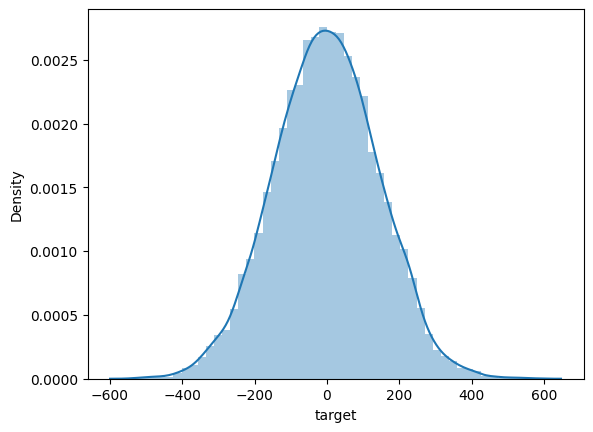

/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


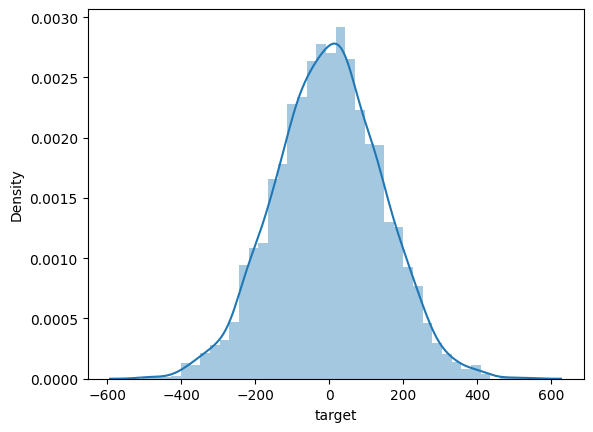

/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


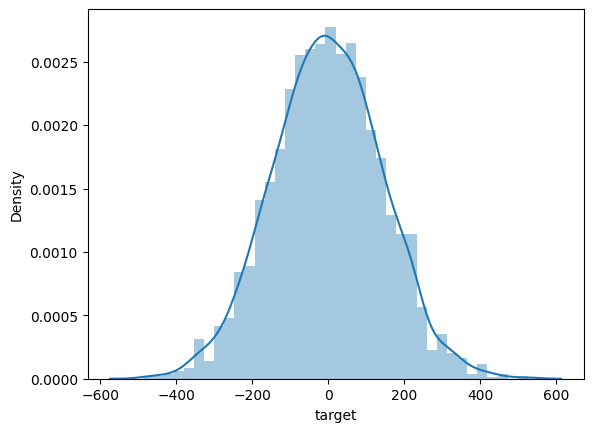

/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


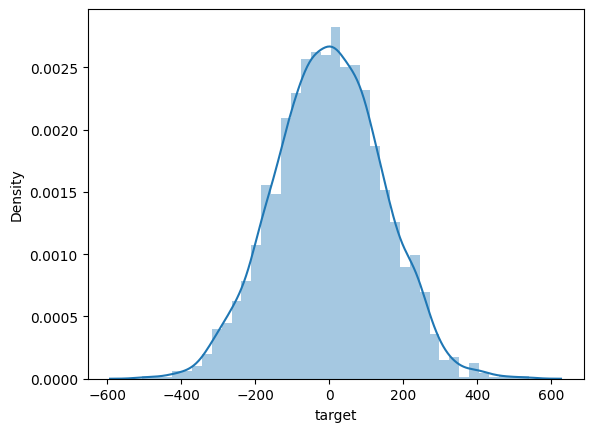

/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


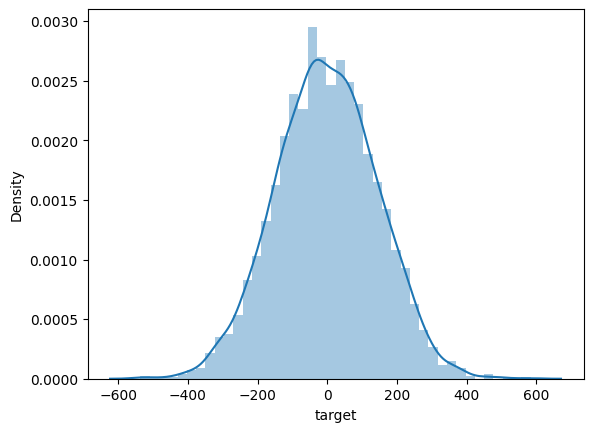

/home/yuma/Desktop/Kaggl-Book/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


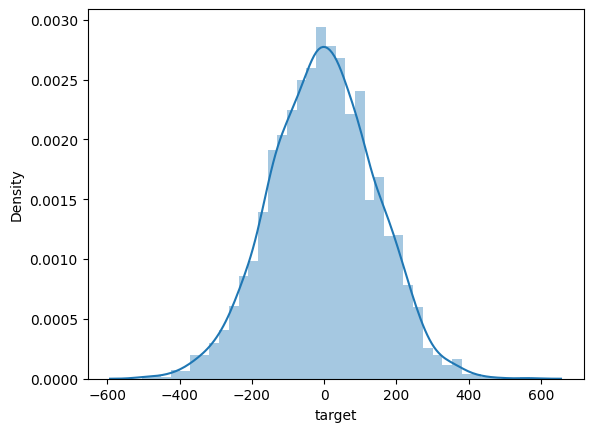

In [71]:
sns.distplot(df["target"])
plt.show()
for i in range(5):
    sns.distplot(df[df["kFold"]==i]["target"])
    plt.show()